In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

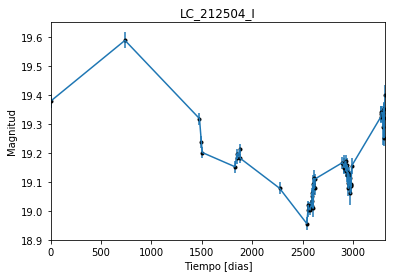

In [2]:
data = np.genfromtxt('LC_212504_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_212504_I')
plt.savefig("LC_212504_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

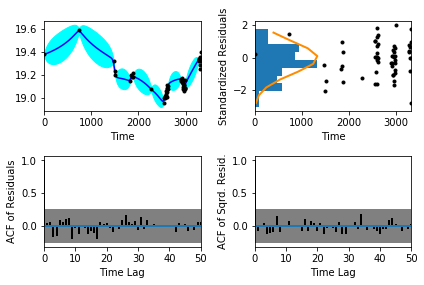

In [5]:
sample.assess_fit()

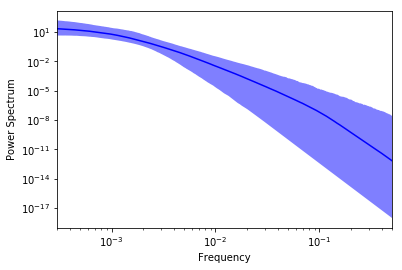

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

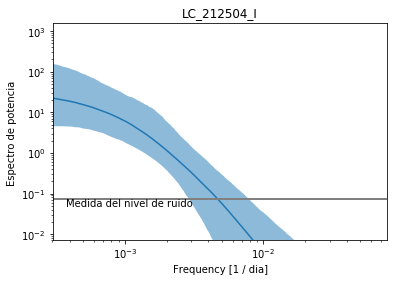

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_212504_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_212504_I')

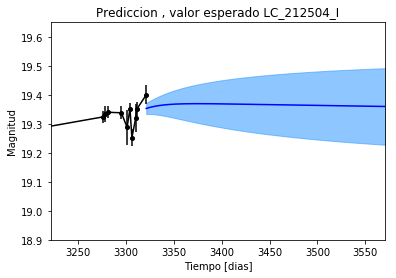

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_212504_I')

Text(0.5,1,'Prediccion, Caminos simulados LC_212504_I')

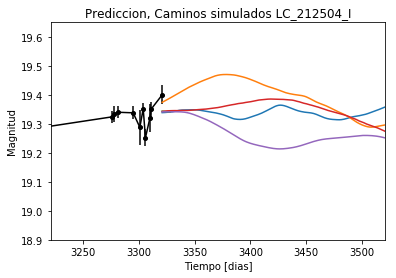

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_212504_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


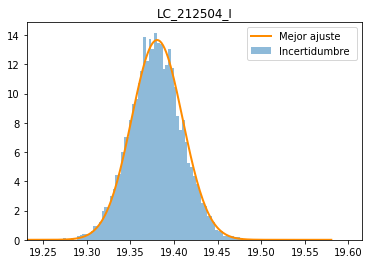

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_212504_I')
plt.savefig("Mejor_ajuste_LC_212504_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_212504_I')

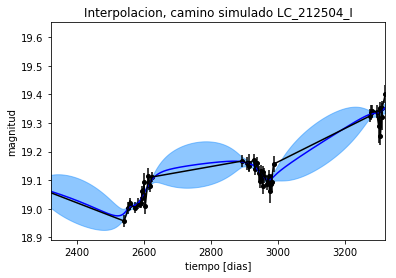

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_212504_I')

Text(0.5,1,'Interpolacion, camino simulado  LC_212504_I')

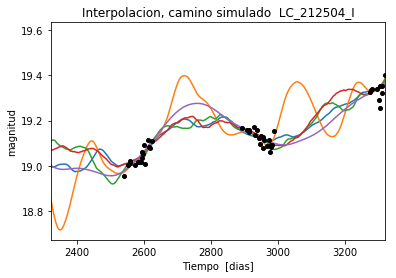

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado  LC_212504_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1542.12965524
Median: 0.0136895989649
Standard deviation: 0.202232580912
68% credibility interval: [ 0.00099305  0.20289646]
95% credibility interval: [  3.66229450e-04   7.88573926e-01]
99% credibility interval: [  3.08465667e-04   9.61647223e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 796.648727953
Median: 0.00144850088154
Standard deviation: 0.0775208290669
68% credibility interval: [ 0.00044678  0.01725986]
95% credibility interval: [ 0.00032208  0.19578018]
99% credibility interval: [  3.05343392e-04   6.23791975e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 300.347498455
Median: 0.0131844991379
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1072.69616788
Median: 131.956183373
Standard deviation: 1.65759089005
68% credibility interval: [ 130.05137325  133.13154711]
95% credibility interval: [ 127.5064124   133.79809523]
99% credibility interval: [ 125.45466513  134.12259604]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 556.880514423
Median: 0.615978683883
Standard deviation: 2.10814504572
68% credibility interval: [ 0.05263479  3.7771994 ]
95% credibility interval: [ 0.01472458  7.20504873]
99% credibility interval: [ 0.01017835  9.63584689]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 2712.14831273
Median: 0.351632247605
Standard deviation: 7.39268382401
68% credibility interval: [ 0.01423653  5.80757077]
95% credibility interval: [  6.91042231e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 7822.60066318
Median: 3.39507878446e-64
Standard deviation: 9.84551362872
68% credibility interval: [  1.55192017e-120   1.61455996e-018]
95% credibility interval: [  9.01549080e-190   2.00690239e-005]
99% credibility interval: [  9.12137810e-284   8.26215400e-002]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2397.63676118
Median: 19.2941268268
Standard deviation: 0.122245008865
68% credibility interval: [ 19.19846587  19.40018917]
95% credibility interval: [ 19.07847831  19.54813402]
99% credibility interval: [ 18.9281118   19.72260825]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 380.16968241
Median: 0.00125057472208
Standard deviation: 0.219750235449
68% credibility interval: [ 0.          0.26269096]
95% credibility interval: [ 0.          0.82561942]
99% credibility interval: [ 0.          0.97450414]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 380.16968241
Median: 0.00125057472208
Standard deviation: 0.219750235449
68% credibility interval: [ 0.          0.26269096]
95% credibility interval: [ 0.          0.82561942]
99% credibility interval: [ 0.          0.97450414]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1732.79602552
Median: 0.0
Standard deviation: 0.000381193400544
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1072.69616788
Median: 131.956183373
Standard deviation: 1.65759089005
68% credibility interval: [ 130.05137325  133.13154711]
95% credibility interval: [ 127.5064124   133.79809523]
99% credibility interval: [ 125.45466513  134.12259604]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1809.36833331
Median: 0.0457152883898
Standard deviation: 0.0725578403878
68% credibility interval: [ 0.02567271  0.09604373]
95% credibility interval: [ 0.01562099  0.24209896]
99% credibility interval: [ 0.01216627  0.4996513 ]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2377.36811465
Median: 1.05160780638
Standard deviation: 0.166218679751
68% credibility interval: [ 0.90606853  1.2244538 ]
95% credibility interval: [ 0.78435171  1.43766128]
99% credibility interval: [ 0.72022298  1.59303678]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1887.7126521
Median: 9.94965221943e-05
Standard deviation: 0.00870698226728
68% credibility interval: [  2.78901892e-06   1.99786942e-03]
95% credibility interval: [  1.03167444e-07   1.29437316e-02]
99% credibility interval: [  1.76069813e-08   3.93608512e-02]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1542.12965524
Median: (-0.0860142870772-0.0607919682601j)
Standard deviation: 1.87643500406
68% credibility interval: [-1.27483603+0.j         -0.00623951-0.01052956j]
95% credibility interval: [ -4.95475611e+00+0.j          -2.30108750e-03-0.01067319j]
99% credibility interval: [ -6.04220770e+00+0.j          -1.93814695e-03-0.01087326j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 796.648727953
Median: (-0.0091011994563+0.0337394829766j)
Standard deviation: 1.46412569743
68% credibility interval: [-0.10844688+0.09556718j -0.00280722+0.00246717j]
95% credibility interval: [-1.23012317+0.57933012j -0.00202369+0.0063433j ]
99% credibility interval: [ -3.91940057e+00+0.54713918j  -1.91852912e-03+0.j        ]
Posterior 